In [154]:
import pandas as pd
import seaborn as sns

In [146]:
data = pd.read_csv('sankaku数据.csv',engine='python')

data['lenght'] = data['tag_list'].apply(lambda x:len(x))

data = data.sort_values('lenght')[3:15]

data

,img_id,tag_list,rating,lenght
689,7445774,"['16:9 aspect ratio', 'tagme']",Safe,30
473,7445998,"['demizu posuka', 'high resolution', 'tagme']",Safe,45
464,7446006,"['demizu posuka', 'high resolution', 'tagme']",Safe,45
221,7446385,"['1girl', 'anal', 'female', 'nude', 'redeye', ...",Explicit,66
462,7446010,"['demizu posuka', 'high resolution', 'very hig...",Questionable,69
384,7446080,"['touken ranbu', 'doudanuki masakuni', '1boy',...",Safe,75
665,7445797,"['16:9 aspect ratio', 'video', 'has audio', 'm...",Questionable,81
517,7445955,"['carro pino', 'carro pino (channel)', 'female...",Safe,86
367,7446097,"['final fantasy', 'final fantasy xiv', 'elf', ...",Safe,87
536,7445937,"['yozakura tama', 'female', 'pixiv id 31778472...",Safe,92


In [147]:
def remove_somble(x):
    x = x.replace("['",'')
    x = x.replace("']",'')
    return x

def rating_vector(x):
    x = x.replace("Safe",'0')
    x = x.replace("Questionable",'1')
    x = x.replace("Explicit",'2')
    return x

In [148]:
data['tag_list'] = data['tag_list'].apply(remove_somble)
data['rating'] = data['rating'].map(rating_vector)
data

,img_id,tag_list,rating,lenght
689,7445774,"16:9 aspect ratio', 'tagme",0,30
473,7445998,"demizu posuka', 'high resolution', 'tagme",0,45
464,7446006,"demizu posuka', 'high resolution', 'tagme",0,45
221,7446385,"1girl', 'anal', 'female', 'nude', 'redeye', 's...",2,66
462,7446010,"demizu posuka', 'high resolution', 'very high ...",1,69
384,7446080,"touken ranbu', 'doudanuki masakuni', '1boy', '...",0,75
665,7445797,"16:9 aspect ratio', 'video', 'has audio', 'mp4...",1,81
517,7445955,"carro pino', 'carro pino (channel)', 'female',...",0,86
367,7446097,"final fantasy', 'final fantasy xiv', 'elf', 'p...",0,87
536,7445937,"yozakura tama', 'female', 'pixiv id 31778472',...",0,92


In [149]:
data = data.drop(columns=['tag_list','lenght']).join(data['tag_list'].str.split("', '",expand=True).stack().reset_index(level=1,drop=True).rename('cata'))

In [150]:
data

,img_id,rating,cata
221,7446385,2,1girl
221,7446385,2,anal
221,7446385,2,female
221,7446385,2,nude
221,7446385,2,redeye
221,7446385,2,sex
221,7446385,2,weryhentai
237,7446227,2,16:9 aspect ratio
237,7446227,2,flash game
237,7446227,2,coming out on top


In [160]:
pd.get_dummies(data,columns=['cata']).set_index('img_id')

,rating,cata_16:9 aspect ratio,cata_1boy,cata_1girl,cata_anal,cata_ass,cata_carro pino,cata_carro pino (channel),cata_coming out on top,cata_contentious content,...,cata_sex,cata_solo,cata_tagme,cata_touken ranbu,cata_very high resolution,cata_video,cata_weryhentai,cata_yozakura tama,cata_yozakura tama (channel),cata_y鈥檚htola rhul
img_id,,,,,,,,,,,,,,,,,,,,,
7446385,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7446385,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7446227,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


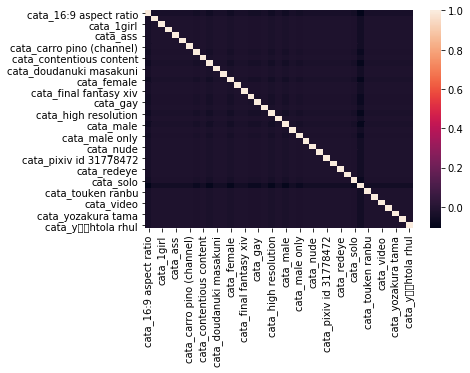

In [161]:
sns.heatmap(pd.get_dummies(data,columns=['cata']).set_index('img_id').corr())

In [162]:
pd.get_dummies(data,columns=['cata']).set_index('img_id').corr()

,cata_16:9 aspect ratio,cata_1boy,cata_1girl,cata_anal,cata_ass,cata_carro pino,cata_carro pino (channel),cata_coming out on top,cata_contentious content,cata_demizu posuka,...,cata_sex,cata_solo,cata_tagme,cata_touken ranbu,cata_very high resolution,cata_video,cata_weryhentai,cata_yozakura tama,cata_yozakura tama (channel),cata_y鈥檚htola rhul
cata_16:9 aspect ratio,1.000000,-0.033068,-0.033068,-0.033068,-0.033068,-0.033068,-0.033068,-0.047147,-0.033068,-0.058222,...,-0.033068,-0.047147,-0.106299,-0.033068,-0.033068,-0.033068,-0.033068,-0.033068,-0.033068,-0.033068
cata_1boy,-0.033068,1.000000,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_1girl,-0.033068,-0.016129,1.000000,-0.016129,-0.016129,-0.016129,-0.016129,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_anal,-0.033068,-0.016129,-0.016129,1.000000,-0.016129,-0.016129,-0.016129,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_ass,-0.033068,-0.016129,-0.016129,-0.016129,1.000000,-0.016129,-0.016129,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_carro pino,-0.033068,-0.016129,-0.016129,-0.016129,-0.016129,1.000000,-0.016129,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_carro pino (channel),-0.033068,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,1.000000,-0.022996,-0.016129,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_coming out on top,-0.047147,-0.022996,-0.022996,-0.022996,-0.022996,-0.022996,-0.022996,1.000000,-0.022996,-0.040489,...,-0.022996,-0.032787,-0.073922,-0.022996,-0.022996,-0.022996,-0.022996,-0.022996,-0.022996,-0.022996
cata_contentious content,-0.033068,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.022996,1.000000,-0.028398,...,-0.016129,-0.022996,-0.051848,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129
cata_demizu posuka,-0.058222,-0.028398,-0.028398,-0.028398,-0.028398,-0.028398,-0.028398,-0.040489,-0.028398,1.000000,...,-0.028398,-0.040489,-0.091287,-0.028398,-0.028398,-0.028398,-0.028398,-0.028398,-0.028398,-0.028398
